# Food Demand of Guatemala ——Team George Washington Carver

In [10]:
!pip install -r requirements.txt

In [3]:
!pip install python-gnupg 
!pip install eep153_tools --upgrade

In [55]:
!pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)


In [4]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

## Data

We edit the dataset from Ed, Guatemala: https://docs.google.com/spreadsheets/d/1YupX14TogoubSrlHtG9OgfBdKUhsss29L63mcNDNCUo/
We begin by defining a dictionary that contains the spreadsheet key.

In [15]:
Guatemala = '1YupX14TogoubSrlHtG9OgfBdKUhsss29L63mcNDNCUo'

In [16]:
x = read_sheets(Guatemala,sheet='Food Expenditures')
x.columns.name = 'j'
x

j,i,t,m,Cooking Oil,Water (bottle),Avocado,Mineral Water,Garlic,Mushrooms,Celery,...,Tea,Tomatoes,Tortillas,Tostadas,Beef Entrails,Chicken Giblets,Yogurt,Yucca,Carrots,Leafcutter Ants and Other Insect
0,1,2000,Metropolitana,7.5,20.0,5.0,6.00,1.00,NaN,2.0,...,7.0,9.0,60.0,NaN,NaN,21.0,NaN,NaN,3.6,NaN
1,10,2000,Metropolitana,15.0,15.0,30.0,NaN,2.00,20.0,2.0,...,8.5,14.0,30.0,NaN,30.0,12.5,NaN,NaN,7.5,NaN
2,100,2000,Metropolitana,13.0,10.5,NaN,16.00,0.25,NaN,2.0,...,NaN,2.5,4.0,NaN,16.0,NaN,NaN,NaN,3.0,NaN
3,1000,2000,Central,9.5,10.0,NaN,NaN,1.50,NaN,1.5,...,NaN,9.0,60.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
4,1001,2000,Central,10.0,20.0,5.0,7.75,1.00,NaN,2.0,...,22.0,6.0,37.5,NaN,12.0,NaN,NaN,1.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,995,2000,Central,NaN,NaN,NaN,18.00,NaN,NaN,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7253,996,2000,Central,13.0,12.0,NaN,12.00,6.00,NaN,2.0,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7254,997,2000,Central,1.5,NaN,NaN,6.50,NaN,NaN,NaN,...,NaN,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7255,998,2000,Central,16.0,37.5,4.0,10.00,0.75,NaN,NaN,...,NaN,9.0,10.0,NaN,NaN,NaN,NaN,2.0,6.0,NaN


Considering the different dimensions of data statistics, we rearrange the Food Price data of Guatemala.

In [17]:
p = pd.read_csv('Team George Washington Guatemala - Food Prices.csv')
p = p.drop(p.columns[1], axis=1)
p = p.T
p = p.set_index(p.iloc[:,0])
p.columns = p.iloc[0]
p = p.drop(p.columns[0], axis=1).iloc[1:]
p

j,Cooking Oil,Water (bottle),Avocado,Mineral Water,Garlic,Mushrooms,Celery,Rice,Peas,Corn Atole,...,Tea,Tomatoes,Tortillas,Tostadas,Beef Entrails,Chicken Giblets,Yogurt,Yucca,Carrots,Leafcutter Ants and Other Insect
0,,,,,,,,,,,,,,,,,,,,,
Central,5.010737261,0.4545454447,1.865671595,2.75077949,4.54545457,12,2.262489754,2.5,3,1.801801779,...,8.341667044,1.5,1.250000028,7.499999969,7.5,4,8.227272722,2,1.06382979,8
Metropolitana,5.368647065,0.2405002401,3.544776031,2.731270434,4.54545457,26,3,2.5,6,2.702702668,...,7.500000168,2,1.04166669,6.683928809,10,4.5,9.090908894,2.5,1.06382979,NaN
Noroccidente,4.545454447,0.2405002401,1.492537276,3.209242684,4.54545457,7,2.265861026,2.25,2.5,1.801801779,...,9.895833555,2,1.04166669,2.000000045,6,4,8.181818004,1,0.638297874,4.5
Nororiente,4.563468033,0.2645502553,3.731343191,3.209242684,9.09090914,10,2.5,2.5,8,2.162162134,...,7.500000168,2.45,2.08333338,3.12500007,10,5,8.658008741,2,2.12765958,6
Norte,5.368647065,0.2405002401,1.492537276,3.209242684,3.787878808,4,2,2.5,2.5,1.801801779,...,12.50000028,2,1.04166669,5.000000112,7,4,7.272727115,1.339285714,2.12765958,NaN
Peten,4.999999892,0.3006252964,1.492537276,3.85109122,9.09090914,5,3,2.5,4,1.801801779,...,NaN,2.5,1.04166669,3.750000084,7,4,8.409090727,2,2.12765958,6
Suroccidente,3.86363628,0.2457002404,1.492537276,3.209242684,4.54545457,10,2.5,2.239999962,4,1.801801779,...,12.50000028,2,1.134259285,3.645833415,8,3.875,6.81818167,1.5,0.6205673775,5
Suroriente,5.368647065,0.2886002882,2.985074553,3.209242684,4.54545457,12,2.670231683,2.5,5,2.477477446,...,150.0000034,2,1.38888892,12.50000028,10,4,4.545454447,2,2.12765958,4.25


In [18]:
d = read_sheets(Guatemala,sheet="Household Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.T.groupby('j').sum().T
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

/tmp/ipykernel_232/3968031923.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0,np.nan) # Replace zeros with missing


In [19]:
d.head()

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99
i,t,m,,,,,,,,,,,,,,
1,2000,Metropolitana,0,1,0,0,0,0,0,0,1,1,0,1,0,0
2,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,2000,Metropolitana,0,0,0,0,2,0,0,0,1,0,1,1,1,0
4,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2000,Metropolitana,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [20]:
y.head()

,,j,Avocado,Bananas,Beans,Beef,Beef Entrails,Beer,Beets,Bread (french),Bread (sliced),Bread (sweet),...,Tomato Sauce,Tomatoes,Tortillas,Tostadas,Vegetable Oil,Water (bottle),Watermelon,Wheat Flour,Yogurt,Yucca
i,t,m,,,,,,,,,,,,,,,,,,,,,
1,2000,Metropolitana,1.609438,2.639057,1.609438,5.828946,NaN,NaN,NaN,3.401197,NaN,3.401197,...,1.504077,2.197225,4.094345,NaN,NaN,2.995732,NaN,NaN,NaN,NaN
10,2000,Metropolitana,3.401197,3.583519,2.302585,5.762051,3.401197,3.178054,NaN,4.430817,2.079442,2.351375,...,1.252763,2.639057,3.401197,NaN,NaN,2.708050,2.708050,1.386294,NaN,NaN
100,2000,Metropolitana,NaN,2.833213,NaN,4.499810,2.772589,NaN,1.504077,1.791759,2.397895,2.302585,...,3.521939,0.916291,1.386294,NaN,NaN,2.351375,NaN,2.525729,NaN,NaN
1000,2000,Central,NaN,3.091042,2.014903,5.075174,NaN,NaN,NaN,3.401197,NaN,3.401197,...,2.302585,2.197225,4.094345,NaN,NaN,2.302585,NaN,0.916291,NaN,NaN
1001,2000,Central,1.609438,2.890372,2.014903,4.927254,2.484907,NaN,1.321756,3.113515,1.909543,3.113515,...,-0.287682,1.791759,3.624341,NaN,NaN,2.995732,0.693147,1.558145,NaN,0.0


## Estimation


In [23]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

### Basic Estimation

In [24]:
from cfe import Regression

result = Regression(y=y,d=d)

In [25]:
result.predicted_expenditures()

i     t     m              j             
1     2000  Metropolitana  Avocado             7.088698
                           Bananas            16.067197
                           Beans               9.494430
                           Beef              100.138098
                           Beef Entrails      13.948086
                                                ...    
7276  2000  Suroriente     Tostadas            9.664286
                           Water (bottle)     11.366774
                           Watermelon          7.872758
                           Wheat Flour         4.710398
                           Yucca               3.394201
Length: 515736, dtype: float64

<Axes: xlabel='yhat', ylabel='y'>

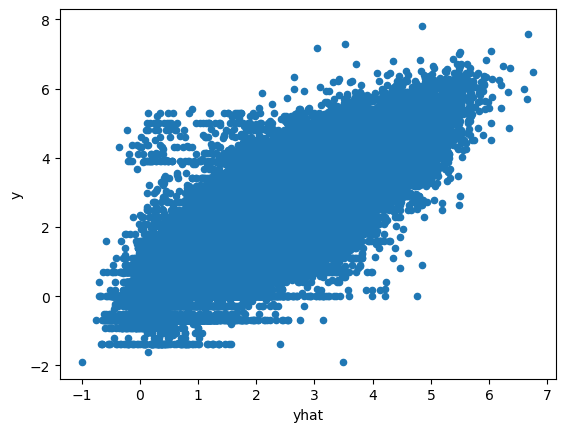

In [26]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

### Parameters

#### (Relative) Income Elasticity
$\beta$ coefficients, which govern how income elastic different goods are (higher values means more elastic)

visualize:

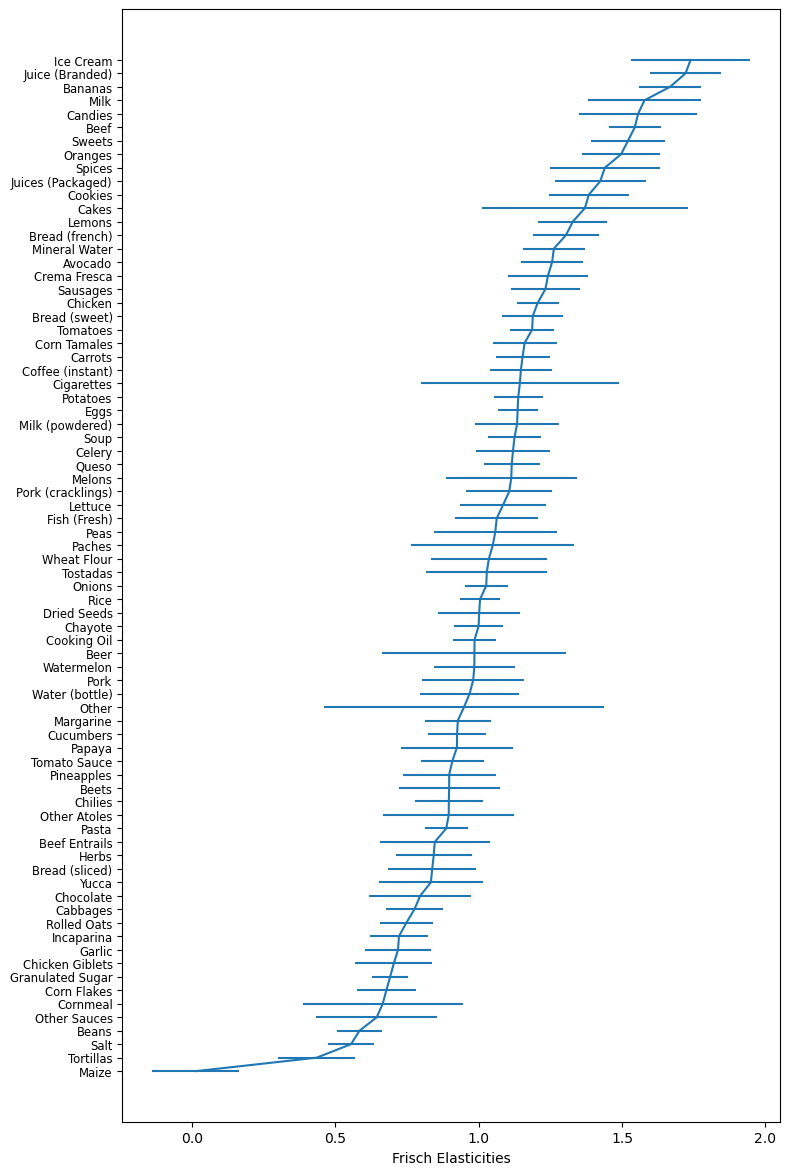

In [27]:
ax = result.graph_beta()

Values of $\beta$:

In [28]:
result.get_beta()

j
Avocado           1.256097
Bananas           1.667667
Beans             0.584281
Beef              1.544521
Beef Entrails     0.846793
                    ...   
Tostadas          1.028208
Water (bottle)    0.968440
Watermelon        0.984878
Wheat Flour       1.035524
Yucca             0.833105
Name: beta, Length: 76, dtype: float64

A higher income elasticity coefficient ($\beta$) indicates that the demand for the good is more sensitive to changes in income, while a lower coefficient suggests less sensitivity. We can draw the conclusion from this that people in Guatemala consume **Maize**, **Tortillas**, **Salt**, **Beans**, and other foods that have low income elasticity as a necessary daily diet, while buy **Ice cream**, **Juice**, and **Bananas** that have high income elasticity only when their income level is high enough. This shows that(_)

#### Demand and Household Composition

In [30]:
result.get_gamma()

k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,Constant
j,,,,,,,,,,,,,,,
Avocado,-0.088275,-0.122866,-0.027481,-0.049743,-0.011544,-0.028603,0.027512,0.000261,0.074529,0.161430,0.158562,0.298749,0.062668,0.063345,1.749162
Bananas,-0.115450,-0.145996,-0.055901,-0.048553,-0.030538,-0.031087,0.020161,0.029274,0.102862,0.200082,0.145734,0.281083,-0.011023,0.132700,2.601493
Beans,0.084385,0.060966,0.117293,0.090192,0.149595,0.105575,0.223101,0.136226,0.151246,0.094017,0.155123,0.098994,0.194210,0.128332,2.569973
Beef,-0.137689,-0.105542,-0.045396,-0.034741,-0.001552,-0.011293,0.048299,0.052845,0.159855,0.250684,0.237983,0.286949,0.059454,0.062816,4.194728
Beef Entrails,0.029093,-0.043311,-0.049139,0.016524,0.048557,0.067730,0.018645,0.094059,0.023180,0.163656,0.100741,0.096734,0.027478,0.029255,2.603261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tostadas,-0.104827,0.018316,-0.005392,0.065595,0.131417,0.026776,0.139571,0.060413,0.036817,0.108625,0.102481,0.105183,-0.017120,0.048025,2.129704
Water (bottle),-0.015467,-0.028098,-0.010616,-0.027088,-0.101461,-0.020004,-0.031444,0.001428,0.060548,0.050409,0.129648,0.256980,0.022353,0.138386,2.741034
Watermelon,0.024007,-0.021794,0.025018,-0.042928,-0.005028,0.076032,0.022955,0.081937,0.061462,0.124539,0.066374,0.153493,-0.003809,-0.024234,1.949779


#### Welfare

<Axes: ylabel='Density'>

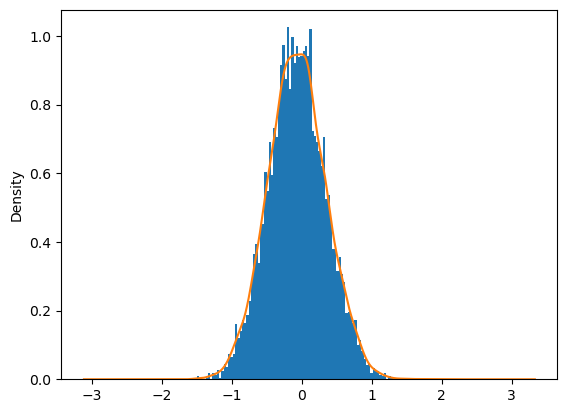

In [31]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [32]:
result.to_pickle('Guatemala_1.pickle')

### Demand and Utility

#### Budgets

In [66]:
import numpy as np

xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

#### Reference Prices

In [67]:
p_numeric = p.map(pd.to_numeric, errors='coerce')
pbar = p_numeric.mean()

In [68]:
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,p=pbar,j='Beans'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

#### Demand as a function of prices

We define a demand_curve function to visualize demand curve for different goods.

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
  
def demand_curve(use):
    # Vary prices from 50% to 200% of reference.
    scale = np.linspace(.5,2,20)
    
    # Demand for Beans for household at median budget
    plt.plot([result.demands(xref,my_prices(pbar[use]*s,pbar,use))[use] for s in scale],scale)
    
    # Demand for Beans for household at 25% percentile
    plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar,use))[use] for s in scale],scale)
    
    # Demand for Beans for household at 75% percentile
    plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar,use))[use] for s in scale],scale)

    plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
    plt.xlabel(f"Quantities of {use} Demanded")

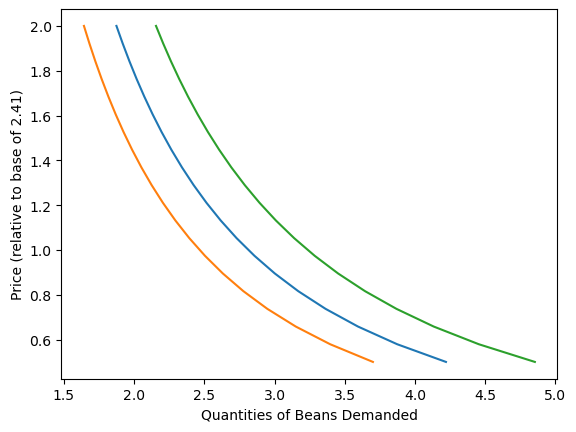

In [52]:
demand_curve('Beans')

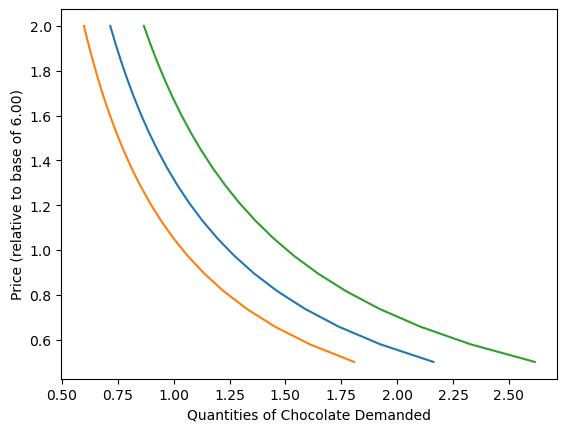

In [53]:
demand_curve('Chocolate')

In [ ]:
From the graph we can tell that the quantities of Beans and 

#### Engel Curves: how demand changes with budget

Text(0.5, 1.0, 'Engel Curves')

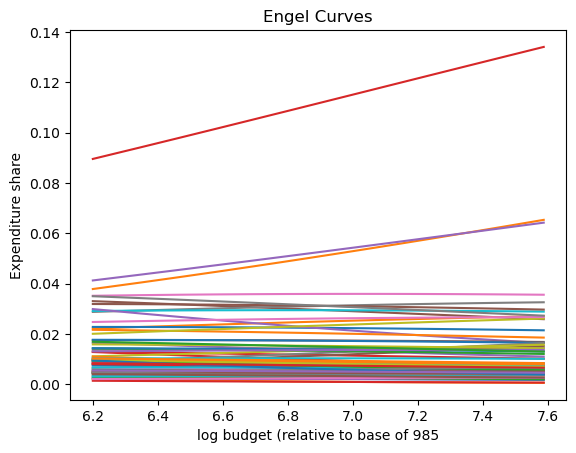

In [62]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

To see more details in the graph, We creat a interactive plot:

In [86]:
import cufflinks as cf
cf.go_offline()

In [87]:
index = pd.Index(np.log(scale * xref),name='log budget')
df = pd.DataFrame([result.expenditures(s*xref,pbar)/(s*xref) for s in scale],index=index)

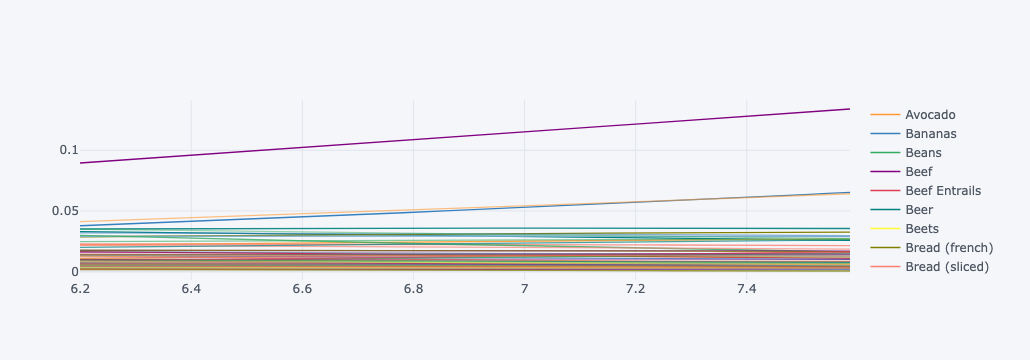

In [88]:
df.iplot()

Turn off Milk, Beef, Avocado to see more details. 

#### Indirect Utility

Text(0.5, 1.0, 'Indirect Utility Function')

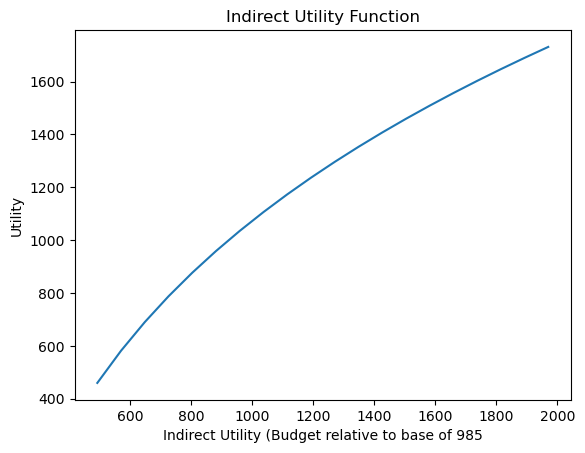

In [48]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')